# Работа №5. Критерий хи-квадрат проверки гипотез

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

Критерий хи-квадрат Пирсона является весьма общим методом построения тестов для проверки различных гипотез. Рассмотрим исходную схему.
### 1. Проверка простой гипотезы о вероятностях
Обозначим:
$A_1, ..., A_m$ - $m$ возможных исходов некоторого опыта;  
$p_1, ..., p_m$ - вероятности соответствующих исходов, $\sum\limits_{i=1}^m p_i = 1$;  
$n$ - число независимых повторений опыта;  
$\nu_1, ..., \nu_m$ - число появлений соответсвующих исходов в $n$ опытах, $\sum\limits_{i=1}^m \nu_i = n$;  
$p_1^0, ..., p_m^0$ - гипотетические значения вероятностей, $p_i^0 \gt 0$, $\sum\limits_{i=1}^m p_i^0 = 1$;  
Требуется по наблюдениям $\nu_1, ..., \nu_m$ проверить гипотезу $H$ о том, что вероятности $p_1, ..., p_m$ имеют значения $p_1^0, ..., p_m^0$, то есть
$$
H: p_i = p_i^0, i=1,...,m.
$$
Оценками для $p_1, ..., p_m$ являются $p_1^{\text{^}} = {\nu_1\over{n}}, ..., p_m^{\text{^}} = {\nu_m\over{n}}$. Мерой расхождения между гипотетическими и эмпирическими вероятностями принимается величина
$$
X^2 = n\sum\limits_{i=1}^m p_i^0 \big( {p_i^{\text{^}} - p_i^0\over{p_i^0}} \big),
$$
которая с точностью до множителя $n$ есть усредненное с весами $p_i^0$ значение квадрата относительного отклонения значений $p_i^{\text{^}}$ от $p_i^0$. Статистика $X^2$ называется статистикой хи-квадрат Пирсона. Для ее вычисления используются две формулы:
$$
X^2 = \sum\limits_{i=1}^m {(\nu_i - np_i^0)^2\over{np_i^0}} = \sum\limits_{i=1}^m {\nu_i^2\over{np_i^0}} - n.
$$
Условно статистику можно записать так:
$$
X^2 = \sum {(H-T)^2\over{T}},
$$
$H$ - наблюдаемые частоты $\nu_i$, $T$ - теоретические (ожидаемые) частоты $np_i^0$. Поскольку по закону больших чисел $p_i^{\text{^}} \rightarrow p_i$ при $n \rightarrow \inf$, то
$$
\sum\limits_{i=1}^m p_i^0 \big( {p_i^{\text{^}} - p_i^0 \over{p_i^0}} \big)^2 \rightarrow \sum\limits_{i=1}^m {(p_i - p_i^0)^2 \over{p_i^0}}.
$$
Последняя величина равна 0, если верна $H$; если же $H$ не верна, то $X^2 \rightarrow \inf$.  
Процедура проверки гипотезы состоит в том, что если величина $X^2$ приняла "слишком большое" значение, то есть если 
$$
X^2 \ge h,
$$
то гипотеза $H$ отклоняется; если это не так, будем говорить, что наблюдения не противоречат гипотезе. На вопрос, что означает $слишком большое$ значение, отвечает  
**Теорема Пирсона.** Если гипотеза $H$ верна и $p_i^0 \gt 0, i=1,...,m$, то при $n \rightarrow \inf$ распределение статистики $X^2$ асимптотически подчиняется распределению хи-квадрат с $m-1$ степенями свободы, то есть
$$
P(X^2 \le x | H) \rightarrow F_{m-1}(x) = P(\chi_{m-1}^2 < x).
$$
Порог $h$ выберем из условия: вероятность ошибки первого рода должна быть малой - равной выбираемому значению $\alpha$ - уровню значимости:
$$
P(отк.H | H) = P(X^2 \ge h | H)= P(\chi_{m-1}^2 \ge h) = \alpha, \text{ откуда } h=Q(1-\alpha, n-1) \text{ - квантиль уровня } 1-\alpha \text{ распределения хи-квадрат с m-1 степенями свободы.}
$$
Процедура проверки может быть записана иначе: гипотеза $H$ отклоняется, если
$$
P(\chi_{m-1}^2 \ge X^2) \le \alpha,
$$
то есть мала вероятность получения (при справедливости $H$) такого же расхождения, как в опыте (то есть $X^2$), или еще большего. Вероятность $P(\chi_{m-1}^2 \ge X^2)$ называется минимальным уровнем значимости (при любом значении $\alpha$, большем $P(\chi_{m-1}^2 \ge X^2)$, гипотеза, очевидно, отклоняется).  
**Замечание.** Теорему Пирсона можно применять, если все ожидаемые частоты
$$
np_i^0 \ge 10, i=1,...,m;
$$
если $m$ порядка десяти и более, достаточно выполнения
$$
np_i^0 \ge 4, i=1,...,m.
$$
Если это условие не выполняется, необходимо некоторые исходы $A_i$ объединять.

### 2. Проверка сложной гипотезы о вероятностях
Пусть $A_1, ..., A_m$ - $m$ исходов некоторого опыта, $n$ - число независимых повторений опыта, $\nu_1, ..., \nu_m$ - числа появлений исходов. Проверяемая гипотеза $H$ предполагает, что вероятности исходов $P(A_i)$ являются известными функциями $P_i(a)$ k-мерного параметра $a = (a_1, ..., a_k)$, то есть
$$
H: P(A_i) = p_i(a), i = 1, ...,m,
$$
но значение $a$ неизвестно.  
Для проверки гипотезы $H$ определим статистику
$$
\overline{X^2} = \min\limits_a \sum\limits_{i=1}^m {(\nu_i - np_i(a))^2\over{np_i(a)}}
$$
По теореме Фишера, если $H$ верна, то при $n \rightarrow \inf$ распределенеи статистики $X^2$ асимптотически подчиняется распределению хи-квадрат с числом степеней свободы $f = m - 1 - k$, и потому отклоняем H, если
$$
\overline{X^2} \ge h, h=Q(1-\alpha, f) \text{ - квантиль распределения хи-квадрат с числом f степеней свободы};
$$
такой порог обеспечивает выбранный уровень $\alpha$ вероятности $P(отк.H|H)$ ошибки первого рода. Если условие не выполянется, делаем вывод, чот наблюдения не противоречат гипотезе. Распределнию хи-квадрат с $f = m - 1 - k$ степенями свободы асимптотически подчиняется также статистика
$$
\overline{X^2} = \sum\limits_{i=1}^m {(\nu_i - np_i(a^{\text{^}}))\over{np_i(a)}}
$$
где $a^{\text{^}}$ - оценка максимального правдоподобия для $a$, и потому процедура может быть записана иначе: если
$$
P(\chi_f^2 \ge X^2) \le \alpha
$$
то гипотеза H отклоняется.

### 3. Проверка гипотезы о типе распределения
Пусть требуется проверить гипотезу о том, что выборка $x_1, ..., x_n$ извлечена из совокупности, распределенной по некоторому закону,  известному с точностью до k-мерного параметра $a = (a_1, ..., a_k)$. Оказываются теоретически обоснованными следующие действия: разобьем весь диапазон наблюдений на $m$ интервалов, определим значения $\nu_i$ - число наблюдений в i-м интервале, получим значение оценки $a^{\text{^}}$ минимизацией или методом максимального правдопобобия, опрелелим вероятности $p_i(a^{\text{^}})$ попадания в i-й интервал, вычислим статистику хи-квадрат Пирсона и примем решение.
**Пример 1. Проверка нормальности** Проверим гипотезу о нормальном законе распределения размеров головое заклепок, сделанных на одной станке, по выборке объема $n=200$; измерения привдены ниже. Оценками для $a$ (среднего) и $\sigma$ (стандартного отклонения) являются
$$
\overline{x} = {1\over{n}} \sum\limits_{i=1}^n x_i, s = \sqrt{{1\over{n-1}}\sum\limits_{i=1}^n (x_i - \overline{x})^2}.
$$

In [2]:
data = np.array([13.39, 13.33, 13.56, 13.38, 13.43, 13.37, 13.53, 13.40, 13.25,
        13.37, 13.28, 13.34, 13.50, 13.38, 13.38, 13.45, 13.47, 13.62,
        13.45, 13.39, 13.53, 13.58, 13.32, 13.27, 13.42, 13.40, 13.57,
        13.46, 13.33, 13.40, 13.57, 13.36, 13.43, 13.38, 13.26, 13.52,
        13.35, 13.29, 13.48, 13.43, 13.40, 13.39, 13.50, 13.52, 13.39,
        13.39, 13.46, 13.29, 13.55, 13.31, 13.29, 13.33, 13.38, 13.61,
        13.55, 13.40, 13.20, 13.31, 13.46, 13.13, 13.43, 13.51, 13.50,
        13.38, 13.44, 13.62, 13.42, 13.54, 13.31, 13.58, 13.41, 13.49,
        13.42, 13.45, 13.34, 13.47, 13.48, 13.59, 13.20, 14.56, 13.55,
        13.44, 13.50, 13.40, 13.48, 13.29, 13.31, 13.42, 13.32, 13.48,
        13.43, 13.26, 13.58, 13.38, 13.48, 13.45, 13.29, 13.32, 13.24,
        13.38, 13.34, 13.14, 13.31, 13.51, 13.59, 13.32, 13.52, 13.57,
        13.62, 13.29, 13.23, 13.37, 13.64, 13.30, 13.40, 13.58, 13.24,
        13.32, 13.52, 13.50, 13.43, 13.58, 13.63, 13.48, 13.34, 13.37,
        13.18, 13.50, 13.45, 13.60, 13.38, 13.33, 13.57, 13.28, 13.32,
        13.40, 13.40, 13.33, 13.20, 13.44, 13.34, 13.54, 13.40, 13.47,
        13.28, 13.41, 13.39, 13.48, 13.42, 13.46, 13.28, 13.46, 13.37,
        13.53, 13.43, 13.30, 13.45, 13.40, 13.45, 13.40, 13.33, 13.39,
        13.56, 13.46, 13.26, 13.35, 13.42, 13.36, 13.44, 13.41, 13.43,
        13.51, 13.51, 13.24, 13.34, 13.28, 13.37, 13.54, 13.43, 13.35,
        13.52, 13.23, 13.48, 13.48, 13.54, 13.41, 13.51, 13.44, 13.36,
        13.36, 13.53, 13.44, 13.69, 13.66, 13.32, 13.26, 13.51, 13.38, 13.46, 13.34])
n = len(data)
x_mean = data.sum() / n
s = np.sqrt(np.sum((data-x_mean)**2)/(n-1))
print(x_mean, s)

13.421499999999998 0.1344475014764735


In [3]:
# Разбиение данных на интервалы
bins = np.histogram_bin_edges(data, bins='auto')

# Получение наблюдаемых частот
observed_freq, _ = np.histogram(data, bins=bins)

# Ожидаемые частоты из нормального распределения
expected_freq = len(data) * np.diff(stats.norm.cdf((bins-x_mean)/s))

# Приведение ожидаемых частот к сумме, равной сумме наблюдаемых
expected_freq *= np.sum(observed_freq) / np.sum(expected_freq)

# Применение хи-квадрат теста
statistic, p_value = stats.chisquare(observed_freq, expected_freq, ddof=2)

alpha = 0.05  # Уровень значимости

print(f"Хи-квадрат статистика: {statistic}")
print(f"p-value: {p_value}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: данные не имеют нормальное распределение")
else:
    print("Нет оснований отвергнуть нулевую гипотезу о нормальном распределении данных")

Хи-квадрат статистика: 14785703345269.318
p-value: 0.0
Отвергаем нулевую гипотезу: данные не имеют нормальное распределение


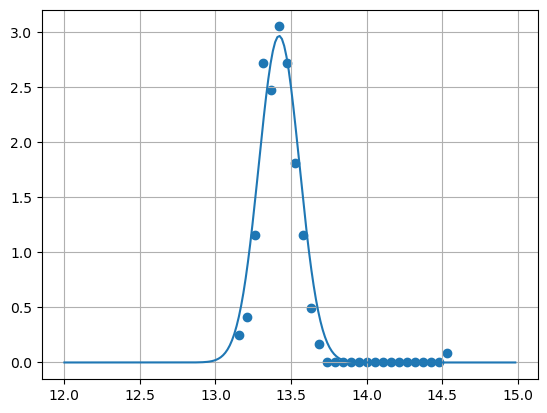

In [4]:
diap = []
for i in range(len(bins)-1):
    diap.append((bins[i]+bins[i+1])/2)
x = np.arange(12, 15, 3/200)
plt.plot(x, stats.norm.pdf(x, x_mean, s))
plt.scatter(diap, 16.5*observed_freq/n)
plt.grid()

In [5]:
# Удалим выборос в данных
data = np.array([13.39, 13.33, 13.56, 13.38, 13.43, 13.37, 13.53, 13.40, 13.25,
        13.37, 13.28, 13.34, 13.50, 13.38, 13.38, 13.45, 13.47, 13.62,
        13.45, 13.39, 13.53, 13.58, 13.32, 13.27, 13.42, 13.40, 13.57,
        13.46, 13.33, 13.40, 13.57, 13.36, 13.43, 13.38, 13.26, 13.52,
        13.35, 13.29, 13.48, 13.43, 13.40, 13.39, 13.50, 13.52, 13.39,
        13.39, 13.46, 13.29, 13.55, 13.31, 13.29, 13.33, 13.38, 13.61,
        13.55, 13.40, 13.20, 13.31, 13.46, 13.13, 13.43, 13.51, 13.50,
        13.38, 13.44, 13.62, 13.42, 13.54, 13.31, 13.58, 13.41, 13.49,
        13.42, 13.45, 13.34, 13.47, 13.48, 13.59, 13.20, 13.55,
        13.44, 13.50, 13.40, 13.48, 13.29, 13.31, 13.42, 13.32, 13.48,
        13.43, 13.26, 13.58, 13.38, 13.48, 13.45, 13.29, 13.32, 13.24,
        13.38, 13.34, 13.14, 13.31, 13.51, 13.59, 13.32, 13.52, 13.57,
        13.62, 13.29, 13.23, 13.37, 13.64, 13.30, 13.40, 13.58, 13.24,
        13.32, 13.52, 13.50, 13.43, 13.58, 13.63, 13.48, 13.34, 13.37,
        13.18, 13.50, 13.45, 13.60, 13.38, 13.33, 13.57, 13.28, 13.32,
        13.40, 13.40, 13.33, 13.20, 13.44, 13.34, 13.54, 13.40, 13.47,
        13.28, 13.41, 13.39, 13.48, 13.42, 13.46, 13.28, 13.46, 13.37,
        13.53, 13.43, 13.30, 13.45, 13.40, 13.45, 13.40, 13.33, 13.39,
        13.56, 13.46, 13.26, 13.35, 13.42, 13.36, 13.44, 13.41, 13.43,
        13.51, 13.51, 13.24, 13.34, 13.28, 13.37, 13.54, 13.43, 13.35,
        13.52, 13.23, 13.48, 13.48, 13.54, 13.41, 13.51, 13.44, 13.36,
        13.36, 13.53, 13.44, 13.69, 13.66, 13.32, 13.26, 13.51, 13.38, 13.46, 13.34])
n = len(data)
x_mean = data.sum() / n
s = np.sqrt(np.sum((data-x_mean)**2)/(n-1))
print(x_mean, s)

13.41577889447236 0.10764828324520705


In [6]:
# Разбиение данных на интервалы
bins = np.histogram_bin_edges(data, bins='auto')

# Получение наблюдаемых частот
observed_freq, _ = np.histogram(data, bins=bins)

# Ожидаемые частоты из нормального распределения
expected_freq = len(data) * np.diff(stats.norm.cdf((bins-x_mean)/s))

# Приведение ожидаемых частот к сумме, равной сумме наблюдаемых
expected_freq *= np.sum(observed_freq) / np.sum(expected_freq)

# Применение хи-квадрат теста
statistic, p_value = stats.chisquare(observed_freq, expected_freq, ddof=2)

alpha = 0.05  # Уровень значимости

print(f"Хи-квадрат статистика: {statistic}")
print(f"p-value: {p_value}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: данные не имеют нормальное распределение")
else:
    print("Нет оснований отвергнуть нулевую гипотезу о нормальном распределении данных")

Хи-квадрат статистика: 2.538525591248768
p-value: 0.9599102068745518
Нет оснований отвергнуть нулевую гипотезу о нормальном распределении данных


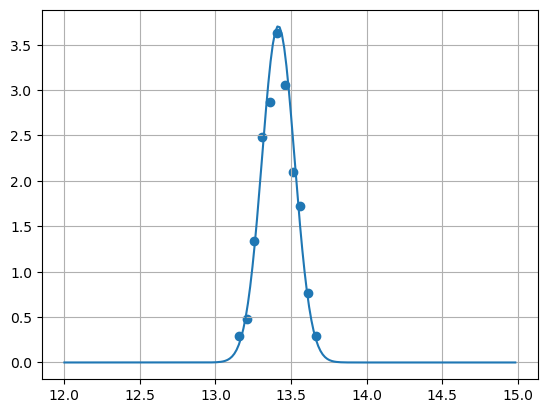

In [7]:
diap = []
for i in range(len(bins)-1):
    diap.append((bins[i]+bins[i+1])/2)
x = np.arange(12, 15, 3/200)
plt.plot(x, stats.norm.pdf(x, x_mean, s))
plt.scatter(diap, 19*observed_freq/n)
plt.grid()

### 4. Примеры проверки простой гипотезы о распределении
**Пример 2.** Проверим генератор случайных чисел. Сгенерируем выборку заданного объема с заданным законом распределения ($R[0, 5], n=130$), и по полученным результатам проверим гипотезу о согласии данных с этим распределением.

In [8]:
data = np.random.uniform(0, 5, 130)

# Разбиение данных на интервалы
bins = np.histogram_bin_edges(data, bins='auto')

# Получение наблюдаемых частот
observed_freq, _ = np.histogram(data, bins=bins)

# Ожидаемые частоты из равномерного распределения
expected_freq = len(data) * np.diff(stats.uniform.cdf(bins/np.max(data)))

# Приведение ожидаемых частот к сумме, равной сумме наблюдаемых
expected_freq *= np.sum(observed_freq) / np.sum(expected_freq)

# Применение хи-квадрат теста
statistic, p_value = stats.chisquare(observed_freq, expected_freq, ddof=2)

alpha = 0.05  # Уровень значимости

print(f"Хи-квадрат статистика: {statistic}")
print(f"p-value: {p_value}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: данные не имеют равномерное распределение")
else:
    print("Нет оснований отвергнуть нулевую гипотезу о равномерном распределении данных")

Хи-квадрат статистика: 9.015384615384612
p-value: 0.1727146979564395
Нет оснований отвергнуть нулевую гипотезу о равномерном распределении данных


**Пример 3.** В опытах по генетике Мендель наблюдал частоты появления различных видов семян, получаемых при скрещивании гороха с круглыми желтыми и с морщинистыми зелеными семенами. Частоты приведены в таблице вместе с теоретическими вероятностями.

In [9]:
pd.DataFrame([[315, '9/16'], [101, '3/16'], [108, '3/16'], [32, '1/16'], ['n=556', 'P=1']],
             columns=['Наблюдаемая частота', 'Теоретическая вероятность Pi'],
             index=['Круглые и желтые', 'Морщинистые и желтые', 'Круглые и зеленые', 'Морщинистые и зеленые', 'Сумма'])

,Наблюдаемая частота,Теоретическая вероятность Pi
Круглые и желтые,315,9/16
Морщинистые и желтые,101,3/16
Круглые и зеленые,108,3/16
Морщинистые и зеленые,32,1/16
Сумма,n=556,P=1


In [10]:
observed_freq = np.array([315, 101, 108, 32])

# Ожидаемые частоты
expected_freq = observed_freq.sum() * np.array([9/16, 3/16, 3/16, 1/16])

# Применение хи-квадрат теста
statistic, p_value = stats.chisquare(observed_freq, expected_freq)

alpha = 0.05  # Уровень значимости

print(f"Хи-квадрат статистика: {statistic}")
print(f"p-value: {p_value}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: полученные данные отличаются от теоретических")
else:
    print("Не удалось отвергнуть нулевую гипотезу: данные хорошо согласуются с теоретическими")

Хи-квадрат статистика: 0.4700239808153477
p-value: 0.925425895103616
Не удалось отвергнуть нулевую гипотезу: данные хорошо согласуются с теоретическими


### 5. Проверка гипотезы о независимости признаков (таблица сопряженности признаков)
Предположим, имеется большая совокупность объектов, каждый из которых обладает двумя признаками $A$ и $B$; признак $A$ имеет $m$ уровней: $A_1,..., A_m$, а признак $B$ - k уровней: $B_1, ..., B_k$. Пусть уровень $A_i$ встречается с вероятностью $P(A_i)$, а уровень $B_j$ - с вероятностью $P(B_j)$. Признаки $A$ и $B$ независимы, если
$$
P(A_i B_j) = P(A_i) \cdot P(B_j)m, i=1,...,m, j=1,...,k,
$$
то есть вероятность встретить комбинацию $A_i B_j$ равна произведению вероятностей. Пусть признаки определены на $n$ объектах, случайно извлеченных из совокупности; $\nu_{ij}$ - число объектов, имеющих комбинацию $A_i B_j$, $\sum\limits_{i=1}^m \sum\limits_{j=1}^k \nu_{ij} = n$.  
По совокупности наблюдейний ($\nu_{ij}$) (таблица $m \cdot k$) требуется проверить гипотезу $H$ о независимости признаков $A$ и $B$. Задача сводится к случаю с неизвестными параметрами; ими являются вероятности
$$
P(A_i), i=1,...,m; P(B_j), j=1,...,k,
$$
всего $(m-1) + (k-1)$; их оценки:
$$
P^{\text{^}}(A_i) = {\sum\limits_{j=1}^k \nu_{ij}\over{n}} = {\nu_{i\cdot}\over{n}}, P^{\text{^}}(B_j) = {\sum\limits_{i=1}^m \nu_{ij}\over{n}} = {\nu_{\cdot j}\over{n}}
$$
(в обозначениях точка означает суммирвоание по соответствующему индексу), и статистика принимает вид:
$$
\overline{X^2} = \sum\limits_{i=1}^m \sum\limits_{j=1}^k {\nu_{ij}^2\over{nP^{\text{^}}(A_i)P^{\text{^}}(B_j)}} - n = n\big( \sum\limits_{i=1}^m \sum\limits_{j=1}^k {\nu_{ij}^2\over{\nu_{i\cdot} \nu_{\cdot j}}} - 1 \big).
$$
Если гипотеза $H$ верна, то по теореме Фишера $\overline{X^2}$ асимптотически распределена по закону хи-квадрат с числом степеней свободы
$$
f = mk - 1 - (m-1) - (k-1) = (m-1)(k-1),
$$
и потому, если 
$$
P(\chi_f^2 \ge \overline{X^2}) \le \alpha,
$$
то гипотезу о независимости признаков следует отклонить. Можно проверять независимость двух случайных величин, разбив диапазоны их значений на m и k частей.  
**Пример 4.** Данные, собранные по ряду школ, относительно физических недостатков школьников (P1, P2, P3 - признак А) и дефектов речи (S1, S2, S3 - признак В) приведены в таблице. В другой таблице даны частоты комбинаций $P_iS_j$, $i, j = 1, 2, 3$. Уровень значимости принять равным 0.001.

In [11]:
pd.DataFrame([[45, 26, 12, 83], [32, 50, 21, 103], [4, 10, 17, 31], [81, 86, 50, 217]],
             columns=['S1', 'S2', 'S3', 'Сумма'],
             index=['P1', 'P2', 'P3', 'Сумма'])

,S1,S2,S3,Сумма
P1,45,26,12,83
P2,32,50,21,103
P3,4,10,17,31
Сумма,81,86,50,217


In [12]:
observed = np.array([[45, 26, 12],
                     [32, 50, 21],
                     [4, 10, 17]])
chi2, p, dof, expected = stats.chi2_contingency(observed)
alpha = 0.001

print(f"Хи-квадрат статистика: {chi2}")
print(f"p-значение: {p}")
print(f"Степени свободы: {dof}")
if p < alpha:
    print('Отклоняем нулевую гипотезу: зависимости есть')
else:
    print('Нет оснований отклонить нулевую гипотезу о независимости признаков')

Хи-квадрат статистика: 32.884269238549074
p-значение: 1.2614536514186429e-06
Степени свободы: 4
Отклоняем нулевую гипотезу: зависимости есть


### 6. Проверка гипотезы об однородности выборок
Пусть имеется $m$ выборок объемами $n_1, ..., n_m$, извлеченных из различных совокупностей. Измеряемая величина в каждо йиз выборок может иметь k уровней $B_1, ..., B_k$. Требуется проверить гипотезу о том, что исходные совокупности распределены одинаково. Обозначим $\nu_{ij}$ - число наблюдений в i-й выборке, имеющих уровень $B_j$, $\sum\limits_{j} \nu_{ij} = \nu_{i\cdot} = n_i$. Имеем табилцу $m\cdot k$ наблюдений, аналогино предыдущему пункту 5. Можно показать, что для проверки гипотезы справедлива процедура из пункта 5.  
**Пример 5.** Имеются данные о наличии примесей серы в углеродистой стали, выплавляемой двумя заводами (см. таблицу). Проверим гипотезу о том, что распределения содержания серы (нежелательный фактор) одинаковы на этих заводах.

In [13]:
pd.DataFrame([[82, 535, 1173, 1714, 3504], [63, 429, 995, 1307, 2794], [145, 964, 2168, 3021, '']],
             columns=['0-2', '2-4', '4-6', '6-8', 'Сумма'],
             index=['Завод 1', 'Завод 2', 'Сумма'])

,0-2,2-4,4-6,6-8,Сумма
Завод 1,82,535,1173,1714,3504
Завод 2,63,429,995,1307,2794
Сумма,145,964,2168,3021,


In [14]:
observed = [[82, 535, 1173, 1714],
            [63, 429, 995, 1307]]
chi2, p, dof, expected = stats.chi2_contingency(observed)
alpha = 0.05

print(f"Хи-квадрат статистика: {chi2}")
print(f"p-значение: {p}")
print(f"Степени свободы: {dof}")
if p < alpha:
    print('Отклоняем нулевую гипотезу: на заводах отличается содержание серы в стали')
else:
    print('Нет оснований отклонить нулевую гипотезу: нет оснований считать,',
          'что содержание серы в стали этих заводов имеют различные распределения')

Хи-квадрат статистика: 3.596579754533992
p-значение: 0.3084503814707133
Степени свободы: 3
Нет оснований отклонить нулевую гипотезу: нет оснований считать, что содержание серы в стали этих заводов имеют различные распределения


### 7. Задание
Проверить гипотезу о типе распределения на основе сгенерированной по заданному закону ($N(0, 1)$) и выборке объема $n=80$. Проверить три гипотезы: о нормальности, о равномерности и о показательности.

In [15]:
# Проверка гипотезы о нормальности
data = np.random.normal(0, 1, 80)
n = len(data)
x_mean = data.sum() / n
s = np.sqrt(np.sum((data-x_mean)**2)/(n-1))


# Разбиение данных на интервалы
bins = np.histogram_bin_edges(data, bins='auto')

# Получение наблюдаемых частот
observed_freq, _ = np.histogram(data, bins=bins)

# Ожидаемые частоты из нормального распределения
expected_freq = len(data) * np.diff(stats.norm.cdf((bins-x_mean)/s))

# Приведение ожидаемых частот к сумме, равной сумме наблюдаемых
expected_freq *= np.sum(observed_freq) / np.sum(expected_freq)

# Применение хи-квадрат теста
statistic, p_value = stats.chisquare(observed_freq, expected_freq, ddof=2)

alpha = 0.05  # Уровень значимости

print(f"Хи-квадрат статистика: {statistic}")
print(f"p-value: {p_value}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: данные не имеют нормальное распределение")
else:
    print("Не удалось отвергнуть нулевую гипотезу о нормальном распределении данных")

Хи-квадрат статистика: 16.35070080988301
p-value: 0.0220984848475421
Отвергаем нулевую гипотезу: данные не имеют нормальное распределение


In [16]:
# Проверка гипотезы о равномерности
data = np.random.normal(0, 1, 80)
n = len(data)
x_mean = data.sum() / n
s = np.sqrt(np.sum((data-x_mean)**2)/(n-1))

# Разбиение данных на интервалы
bins = np.histogram_bin_edges(data, bins='auto')

# Получение наблюдаемых частот
observed_freq, _ = np.histogram(data, bins=bins)

# Ожидаемые частоты из равномерного распределения
expected_freq = len(data) * np.diff(stats.uniform.cdf(bins/np.max(data)))

# Приведение ожидаемых частот к сумме, равной сумме наблюдаемых
expected_freq *= np.sum(observed_freq) / np.sum(expected_freq)

# Применение хи-квадрат теста
statistic, p_value = stats.chisquare(observed_freq, expected_freq, ddof=2)

alpha = 0.05  # Уровень значимости

print(f"Хи-квадрат статистика: {statistic}")
print(f"p-value: {p_value}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: данные не имеют равномерное распределение")
else:
    print("Не удалось отвергнуть нулевую гипотезу о равномерном распределении данных")

Хи-квадрат статистика: inf
p-value: 0.0
Отвергаем нулевую гипотезу: данные не имеют равномерное распределение


C:\Users\assas\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:7160: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp


In [17]:
# Проверка гипотезы о показательности
data = np.random.normal(0, 1, 80)
n = len(data)
x_mean = data.sum() / n
s = np.sqrt(np.sum((data-x_mean)**2)/(n-1))

# Разбиение данных на интервалы
bins = np.histogram_bin_edges(data, bins='auto')

# Получение наблюдаемых частот
observed_freq, _ = np.histogram(data, bins=bins)

# Ожидаемые частоты из экспоненциального распределения
expected_freq = len(data) * np.diff(stats.expon.cdf(bins, scale=x_mean))

# Приведение ожидаемых частот к сумме, равной сумме наблюдаемых
expected_freq *= np.sum(observed_freq) / np.sum(expected_freq)

# Применение хи-квадрат теста
statistic, p_value = stats.chisquare(observed_freq, expected_freq)

alpha = 0.05  # Уровень значимости

print(f"Хи-квадрат статистика: {statistic}")
print(f"p-value: {p_value}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: данные не имеют экспоненциальное распределение")
else:
    print("Не удалось отвергнуть нулевую гипотезу об экспоненциальном распределении данных")

Хи-квадрат статистика: nan
p-value: nan
Не удалось отвергнуть нулевую гипотезу об экспоненциальном распределении данных


**Проверить гипотезу об однородности трех выборок**
Сгенерировать три выборки объемами $n_1 = 180$, $n_2 = 100$, $n_3 = 120$ для заданного распределения ($N(a, 1)$). Провести их группирование на 8 ÷ 10 интервалах. Сделать все для 2-х вариантов:  
а) Параметры одинаковы: $a_1 = a_2 = a_3 = 10$  
б) Параметры различны: $a_1 = 9.8$, $a_2 = 10$, $a_3 = 11.2$

In [18]:
# Генерация выборок для варианта а) с параметрами a1 = a2 = a3 = 10
a1 = a2 = a3 = 10
n1, n2, n3 = 180, 100, 120

sample1 = np.random.normal(a1, 1, n1)
sample2 = np.random.normal(a2, 1, n2)
sample3 = np.random.normal(a3, 1, n3)
samples = [sample1, sample2, sample3]
x_mean = (sample1.mean() + sample2.mean() + sample3.mean()) / 3

bins = np.histogram_bin_edges(sample1, bins=10)

intervals = np.array([np.histogram(sample, bins=bins)[0] for sample in samples])
observed = intervals[0] + intervals[1] + intervals[2]

expected = np.histogram(np.random.normal(x_mean, 1, n1+n2+n3), bins=bins)[0]
expected = expected * (np.sum(observed) / np.sum(expected))

statistic, p_value = stats.chisquare(observed, expected)

print(f"Статистика хи-квадрат: {statistic}")
print(f"p-значение: {p_value}")

alpha = 0.05
if p_value < alpha:
    print('Гипотеза об однородности отвергается')
else:
    print('Гипотеза об однородности не отвергается')

Статистика хи-квадрат: 22.04976414451616
p-значение: 0.008722591624893774
Гипотеза об однородности отвергается


In [19]:
# Генерация выборок для варианта б) с параметрами a1 = 9.8, a2 = 10, a3 = 11.2
a1 = 9.8
a2 = 10
a3 = 11.2
n1, n2, n3 = 180, 100, 120

sample1 = np.random.normal(a1, 1, n1)
sample2 = np.random.normal(a2, 1, n2)
sample3 = np.random.normal(a3, 1, n3)
samples = [sample1, sample2, sample3]
x_mean = (sample1.mean() + sample2.mean() + sample3.mean()) / 3

bins = np.histogram_bin_edges(sample1, bins=10)

intervals = np.array([np.histogram(sample, bins=bins)[0] for sample in samples])
observed = intervals[0] + intervals[1] + intervals[2]

expected = np.histogram(np.random.normal(x_mean, 1, n1+n2+n3), bins=bins)[0]
expected = expected * (np.sum(observed) / np.sum(expected))

statistic, p_value = stats.chisquare(observed, expected)

print(f"Статистика хи-квадрат: {statistic}")
print(f"p-значение: {p_value}")

alpha = 0.05
if p_value < alpha:
    print('Гипотеза об однородности отвергается')
else:
    print('Гипотеза об однородности не отвергается')

Статистика хи-квадрат: 32.761664614053856
p-значение: 0.00014692980983433616
Гипотеза об однородности отвергается
